# Monte Carlo methods    Copy right to Mr.Gerard Martínez https://towardsdatascience.com/reinforcement-learning-rl-101-with-python-e1aa0d37d43b

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


# First-visit Monte Carlo

In [11]:
# parameters
gamma = 0.6 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 10000

In [12]:
# initialization
print((gridSize, gridSize))
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]
print(returns,'\n')   # dict={(index,):[list],}

print(deltas,'\n')
print(states) # list[list]

(4, 4)
{(0, 0): [], (0, 1): [], (0, 2): [], (0, 3): [], (1, 0): [], (1, 1): [], (1, 2): [], (1, 3): [], (2, 0): [], (2, 1): [], (2, 2): [], (2, 3): [], (3, 0): [], (3, 1): [], (3, 2): [], (3, 3): []} 

{(0, 0): [], (0, 1): [], (0, 2): [], (0, 3): [], (1, 0): [], (1, 1): [], (1, 2): [], (1, 3): [], (2, 0): [], (2, 1): [], (2, 2): [], (2, 3): [], (3, 0): [], (3, 1): [], (3, 2): [], (3, 3): []} 

[[0, 0], [0, 1], [0, 2], [0, 3], [1, 0], [1, 1], [1, 2], [1, 3], [2, 0], [2, 1], [2, 2], [2, 3], [3, 0], [3, 1], [3, 2], [3, 3]]


In [13]:
# utils
print(states[1:-1])# all states except first and last one 
print(random.choice(actions))
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState)+np.array(action)
#         print(finalState)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState

[[0, 1], [0, 2], [0, 3], [1, 0], [1, 1], [1, 2], [1, 3], [2, 0], [2, 1], [2, 2], [2, 3], [3, 0], [3, 1], [3, 2]]
[-1, 0]


In [14]:

for it in tqdm(range(numIterations)):
    episode = generateEpisode()
    G = 0
    #print(episode)
    for i, step in enumerate(episode[::-1]):
        G = gamma*G + step[2]
        if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx = (step[0][0], step[0][1])
            returns[idx].append(G)
            newValue = np.average(returns[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-newValue))
            V[idx[0], idx[1]] = newValue
print(episode[0]) #  [list(initState), action, rewardSize, list(finalState)]

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:13<00:00, 765.90it/s]

[[2, 3], [-1, 0], -1, [1, 3]]


In [15]:
# print(tqdm(range(numIterations)))

In [16]:
# V[idx[0], idx[1]]
# # newValue

V  # stste value function 

array([[ 0.        , -1.64048392, -2.21845165, -2.38682496],
       [-1.62554999, -2.10774518, -2.28320438, -2.22007561],
       [-2.21024504, -2.28015743, -2.1058719 , -1.63830297],
       [-2.38491078, -2.20751309, -1.63742955,  0.        ]])

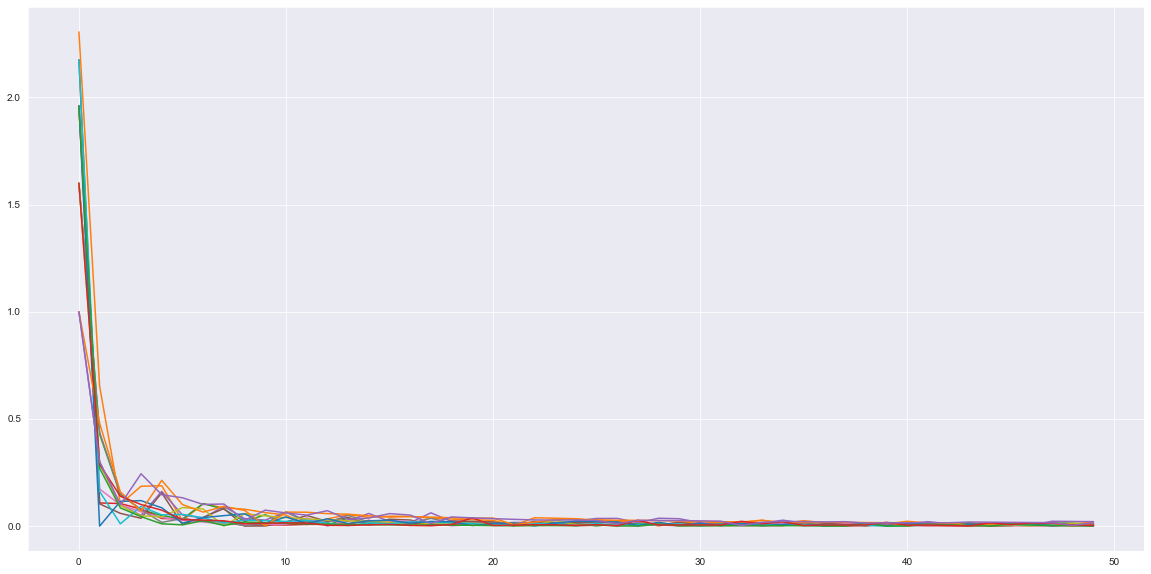

In [17]:
# using gamma = 0.6
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

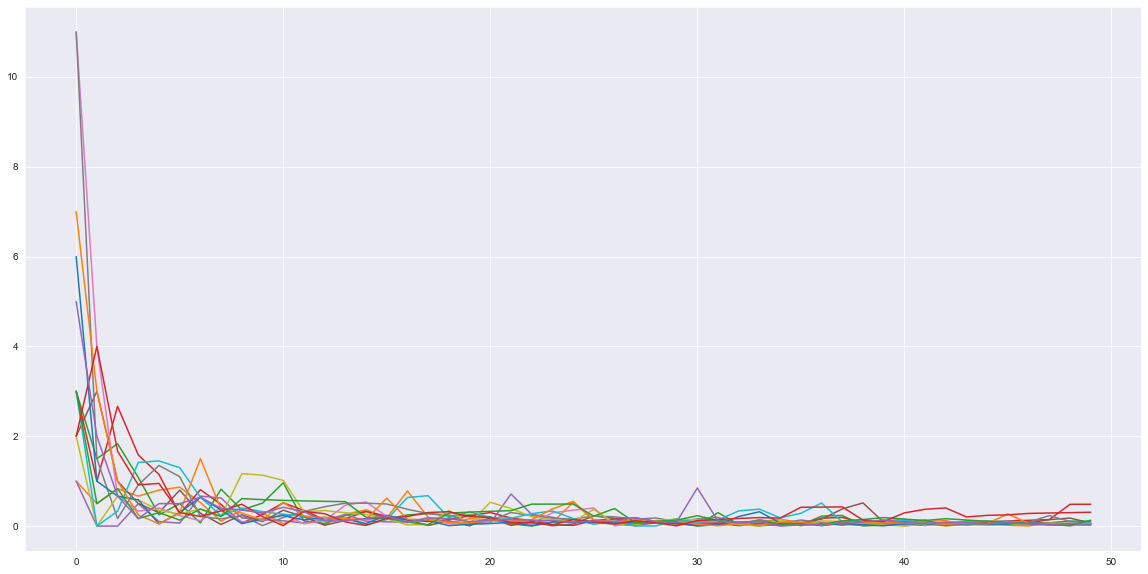

In [10]:
# # using gamma = 1
# plt.figure(figsize=(20,10))
# all_series = [list(x)[:50] for x in deltas.values()]
# for series in all_series:
#     plt.plot(series)